# Fitting Thomson Scattering Spectrum

See Spectra_fitting_README.md for details

In [1]:
%matplotlib inline
import ts_analysis as TsA
import os

# s0822_15

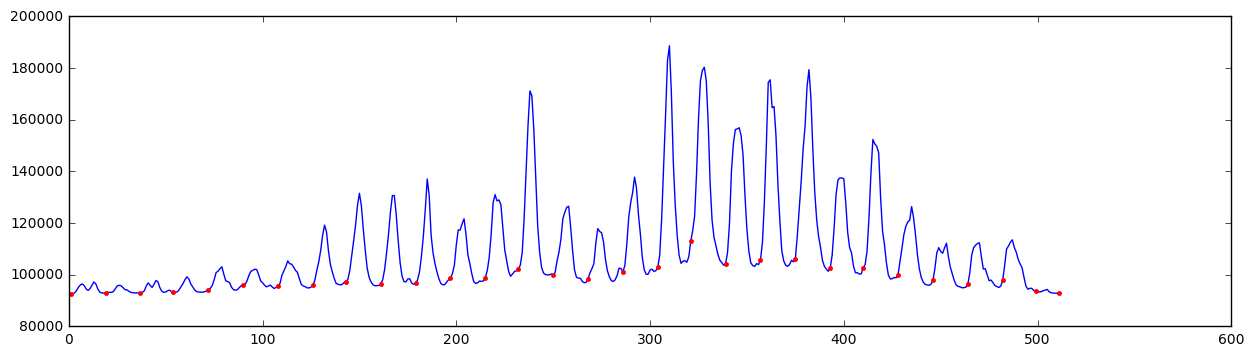

In [2]:
folder=r"\\linna\Users\Magpie\Documents\MAGPIE data\2016\Aug_2016\s0822_16 Reconnection C - TS w kz\s0822_16 TS"
shot_fn='s0822_16 shot.asc'
ts=TsA.TS_Analysis(folder, shot_fn,['s0816_16 A fibre bundle in beam.asc','s0816_16 B fibre bundle in beam.asc'])

ts.find_fibre_edges()

In [3]:
'''Split image into fibres'''
ts.split_into_fibres(discard_rows=3)
ts.zero_fibres(upper=1150, lower=850)
a_angle=[60]*14 #here we have fibres 1A through 14A at an angle of 45'
b_angle=[120]*14
ts.pair_fibres(a_angle,b_angle)

[[Model]]
    Model(Skw_nLTE_stray_light_convolve)
[[Fit Statistics]]
    # function evals   = 2778
    # data points      = 294
    # variables        = 6
    chi-square         = 108427455.654
    reduced chi-square = 376484.221
    Akaike info crit   = 3780.496
    Bayesian info crit = 3802.597
[[Variables]]
    T_e:      1.00006633 +/- 201.6315 (20161.81%) (init= 100)
    T_i:      318.396864 +/- 161.1602 (50.62%) (init= 60)
    V_fi:    -1.0465e+05 +/- 4.55e+03 (4.35%) (init= 0)
    stry:     9078.74643 +/- 423.9889 (4.67%) (init= 10000)
    amp:      1896.04428 +/- 273.9465 (14.45%) (init= 10000)
    offset:   222.456089 +/- 312.1684 (140.33%) (init= 120)
[[Correlations]] (unreported correlations are <  0.100)
    C(T_e, offset)               = -0.991 
    C(T_e, T_i)                  = -0.920 
    C(T_i, offset)               =  0.893 
    C(T_i, amp)                  = -0.878 
    C(amp, offset)               = -0.855 
    C(T_e, amp)                  =  0.847 
    C(T_i, stry)

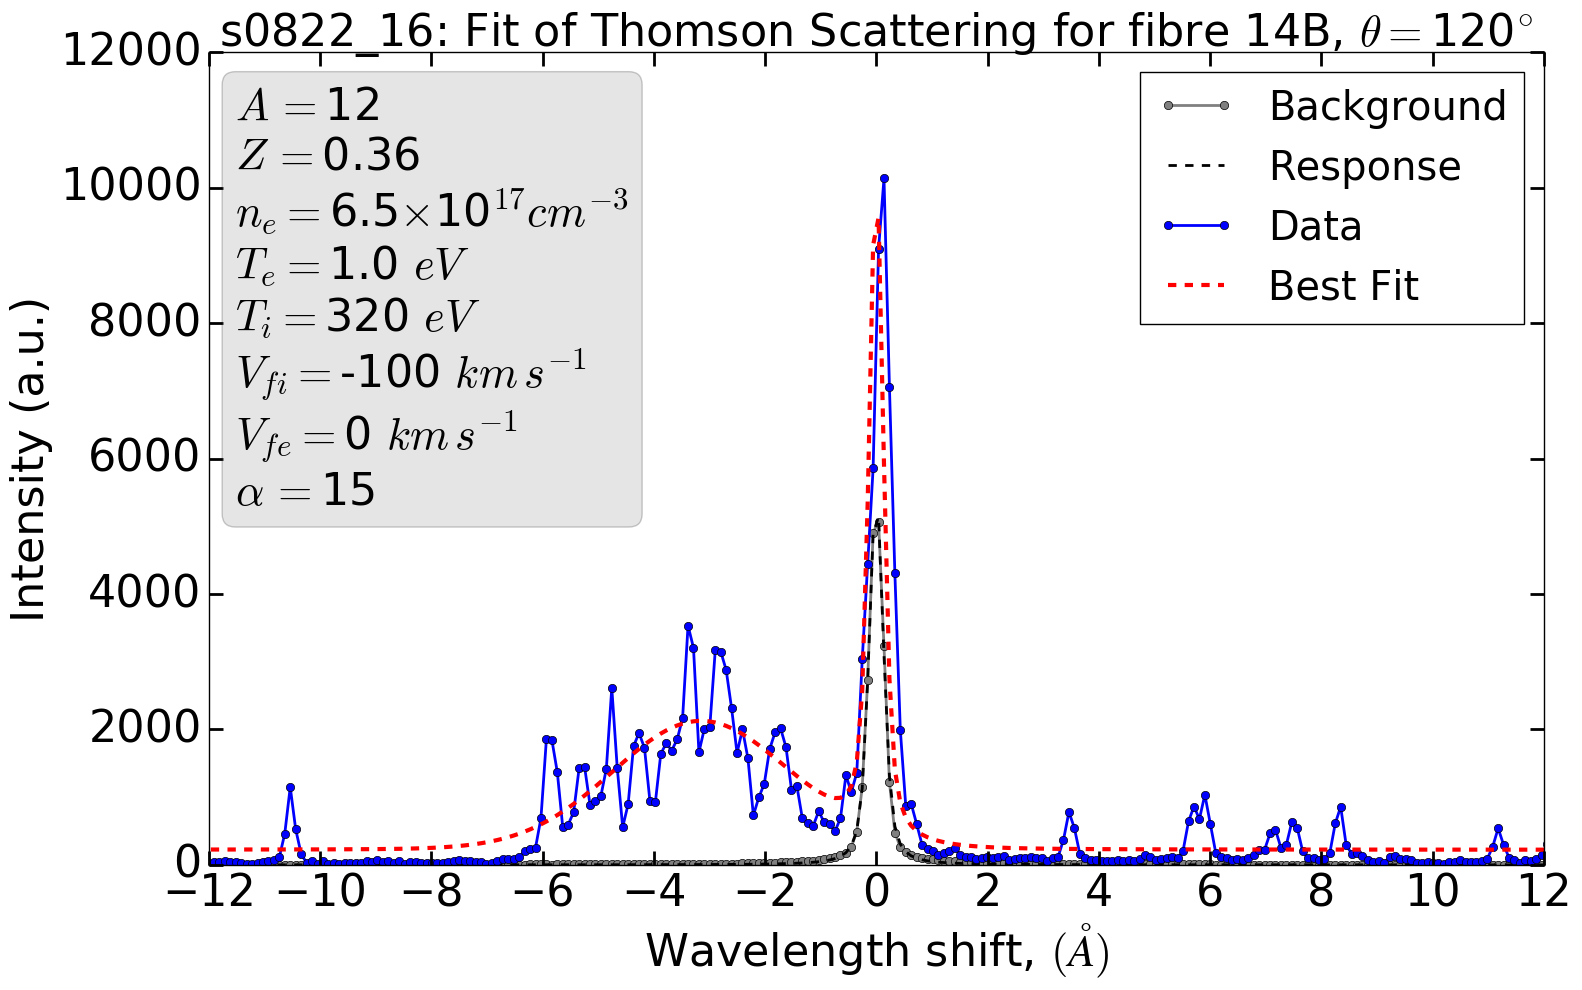

In [32]:
'''
Specify the plasma parameters in the form (V
alues, Minimum, Independent)
If Independent is True, then the value is fixed and minimum has no meaning
If Independent is False, then the value is an initial guess for the fit
and minimum is either a float, or None to specify no given minimum
For multi-species fits, Aj, Zj and Fj only can have their value as a tuple (A1,A2...Aj)
Even for a single-species fit, enclose A, Z and F in (), eg. 'Aj':((12), True, None)
'''
'''Choose the fibre to fit'''
Fnum=14
Fset='B'


plasma_parameters={ 'model': 'nLTE',
                    'n_e': (6.5e17,True),#in cm^-3, must be specified
                    'T_e': (100, False,1),#In electron volts. 
                    'V_fe':(0, True),#m/s.
                    'A':  ((12,), True),#in nucleon masses, must be specified
                    'T_i': (60, False,1),#In electron volts.
                    'V_fi':(0, False),#m/s.
                    'stry':(10000, False), #Fraction of signal made up of stray light. >0, <1.0!!
                    'amp': (10000, False,0), #Fraction of signal made up of spectrum.
                    'offset': (120, False), #
                    'shift': (0, True)
                    }

'''This code fits and plots the result'''
f=ts.select_fibre(Fnum,Fset)
f.voigt_response()
f.fit_fibre(plasma_parameters)
ts.pretty_plot(Fnum,Fset, tm=1.6, sr=12)
print(f.skw_res.fit_report())

In [31]:
f.export_data('s0822_16 TS F8B')

In [5]:
ts.fig.savefig('Figures/s0611_15 fibre 8A largetext.pdf')

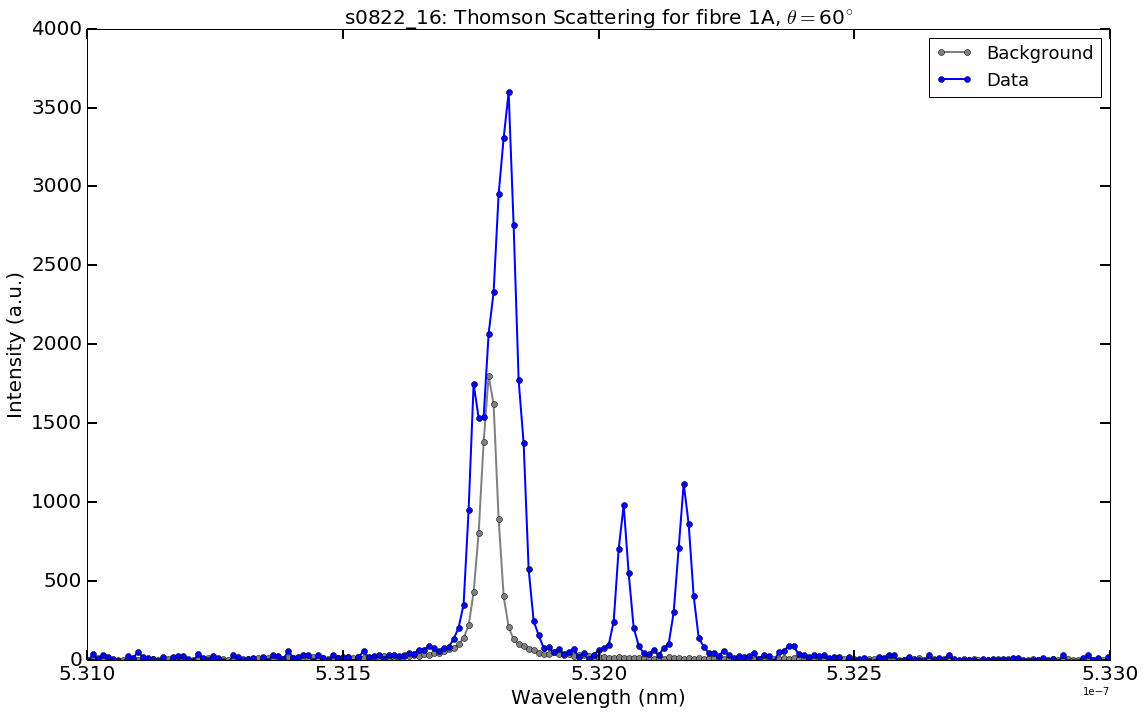

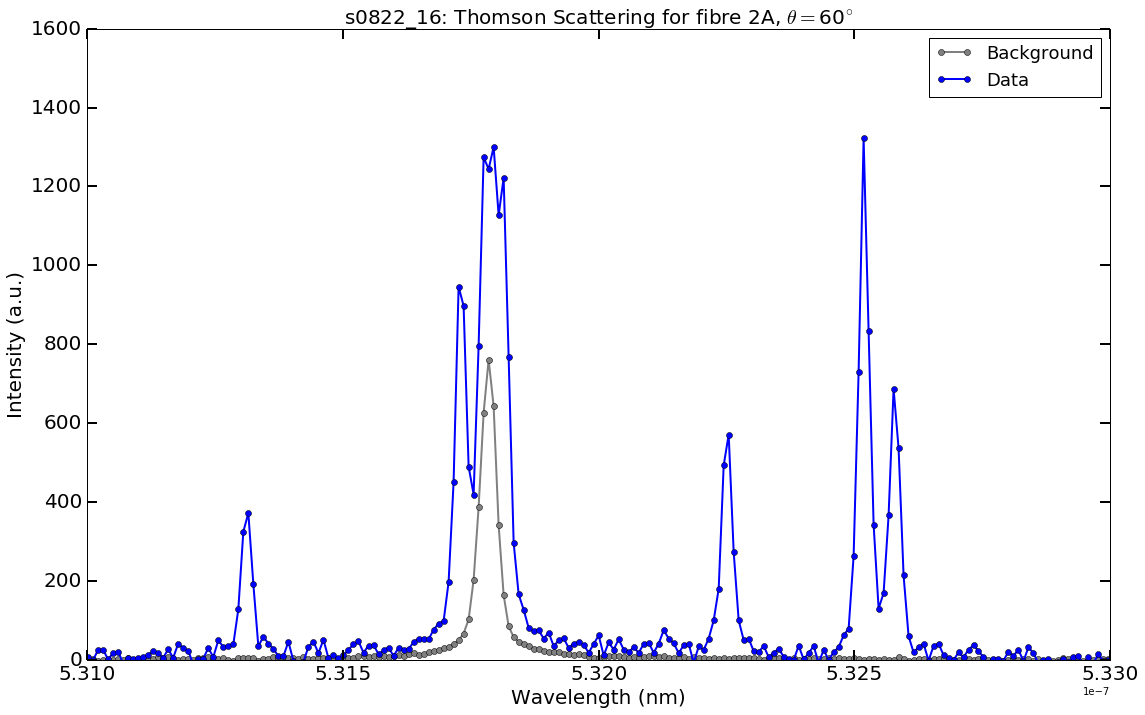

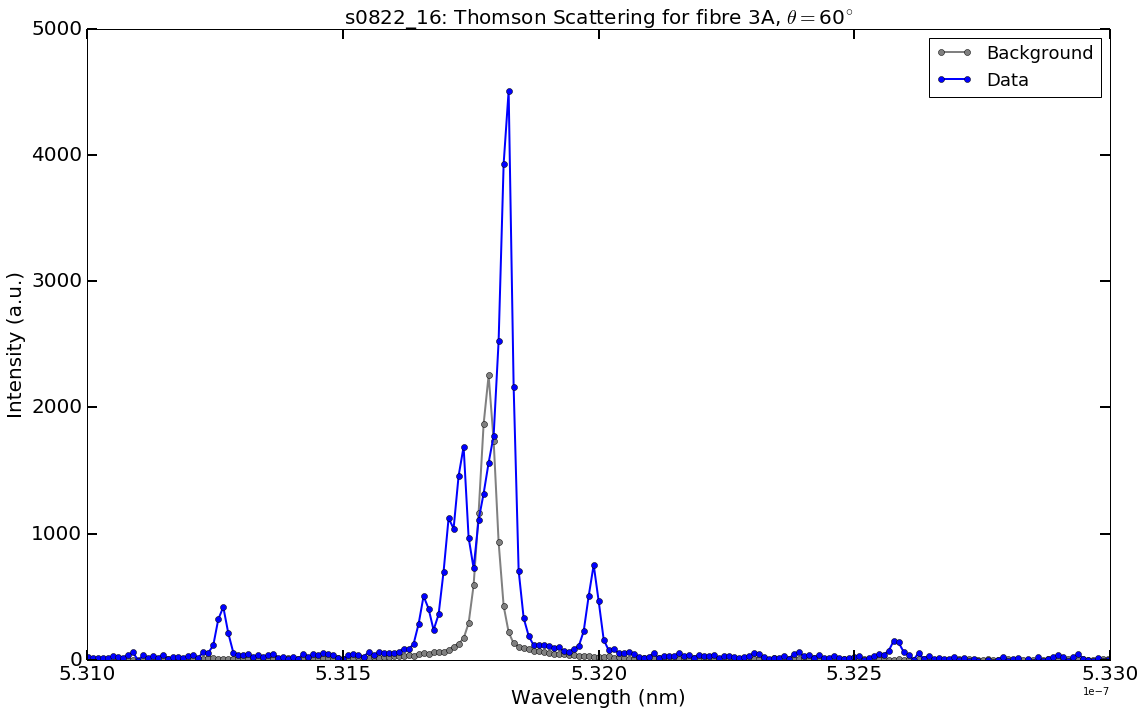

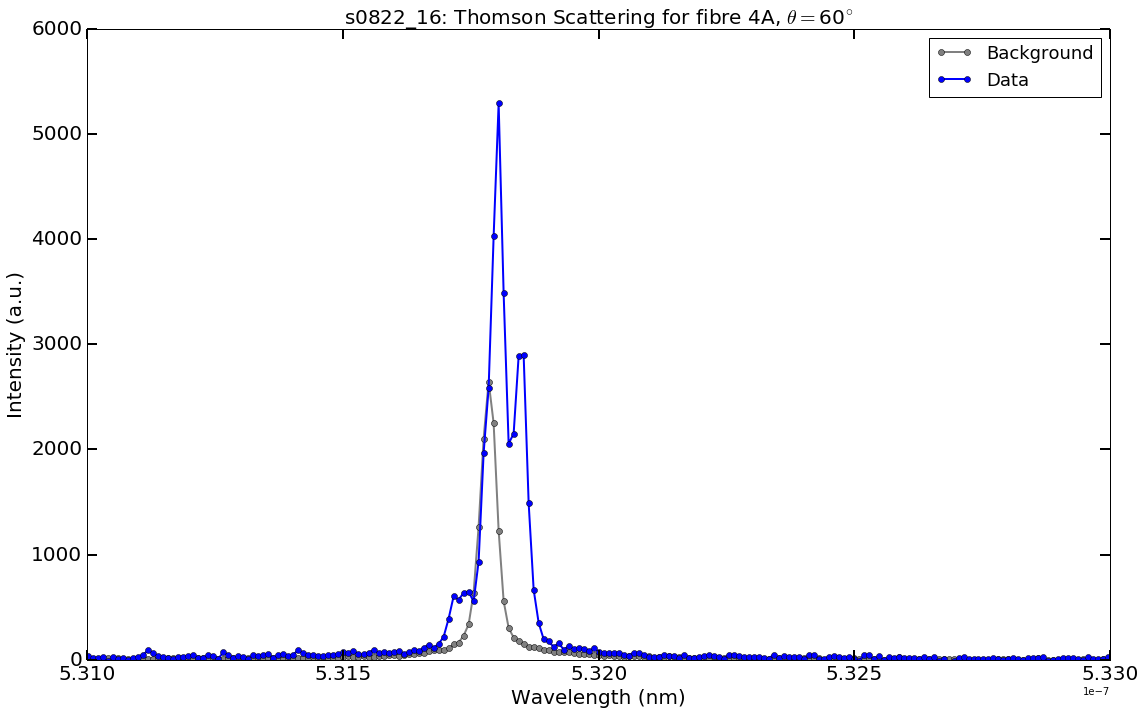

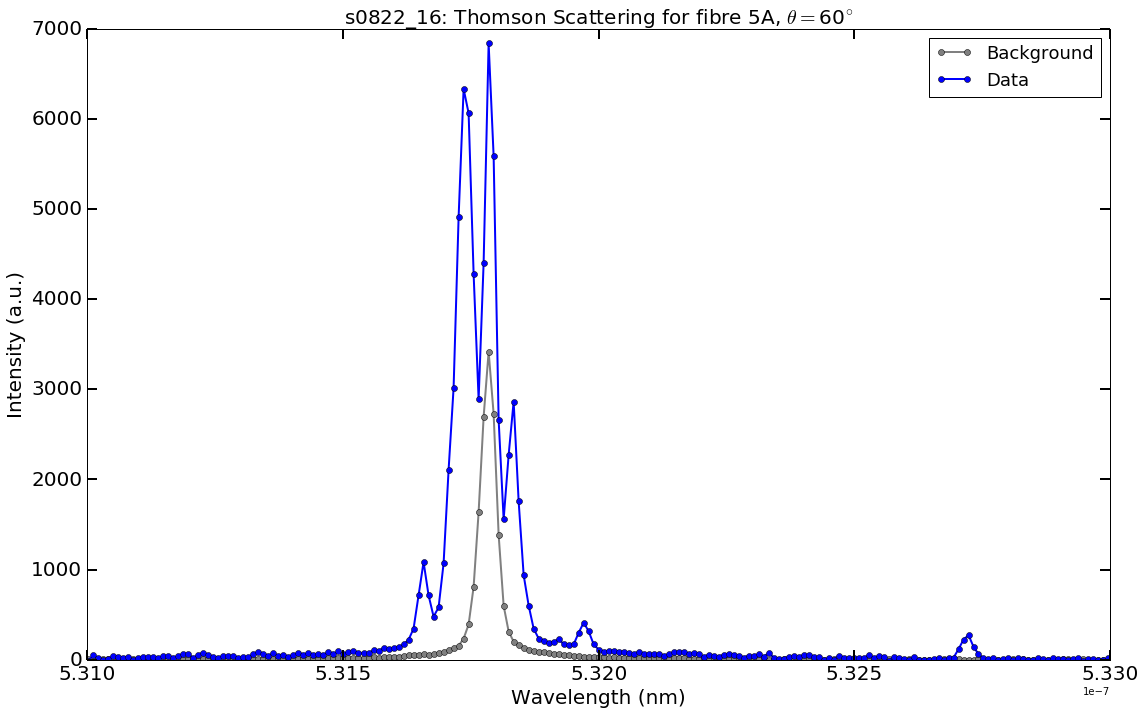

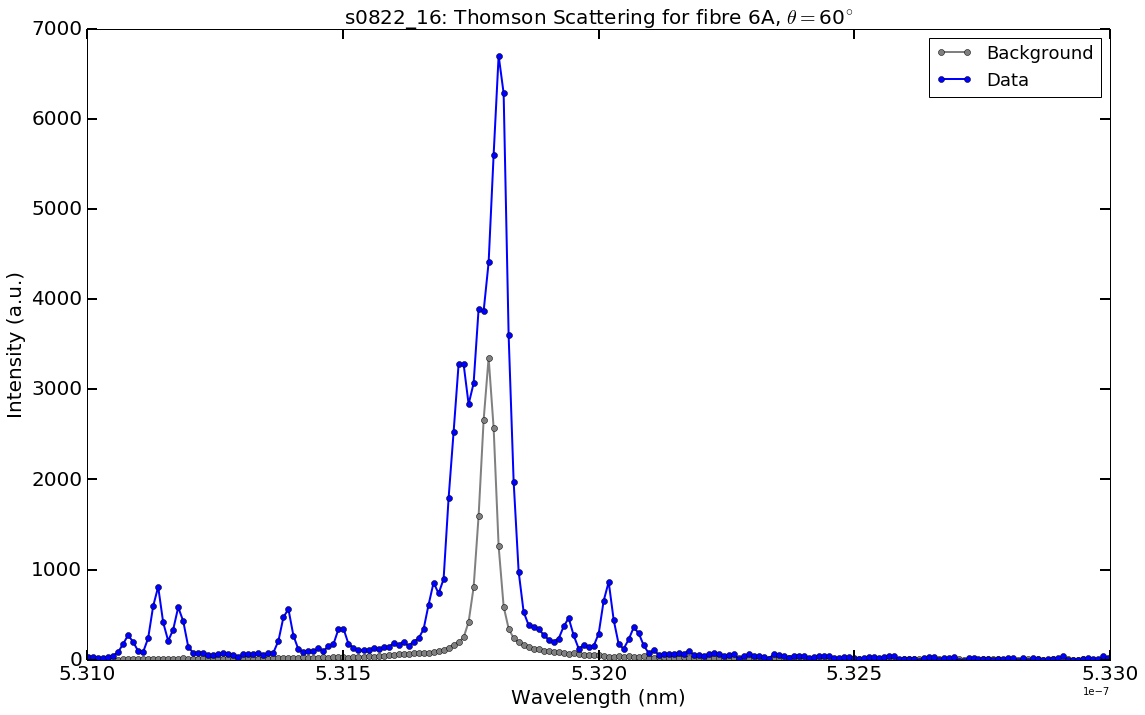

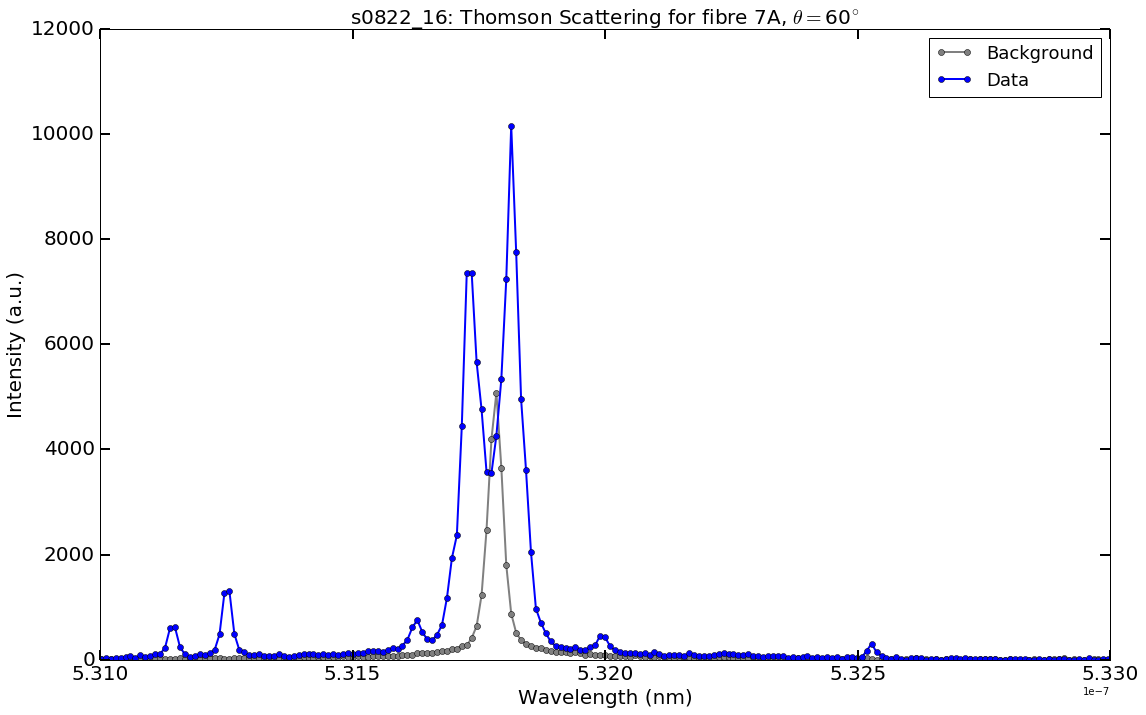

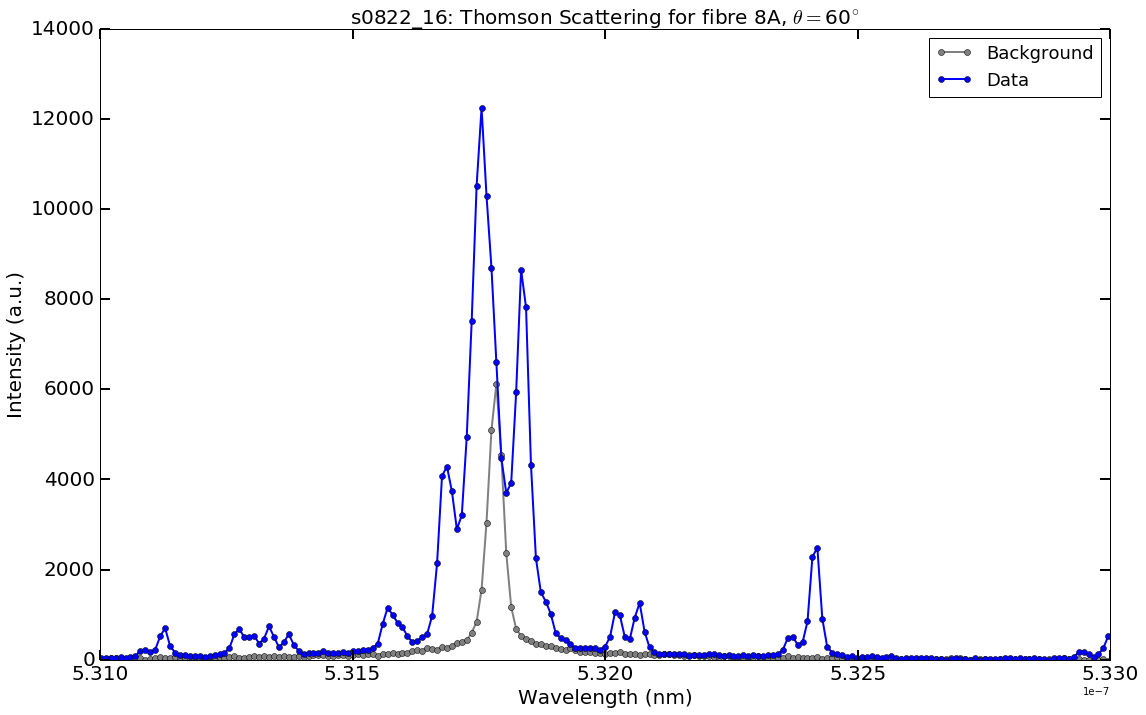

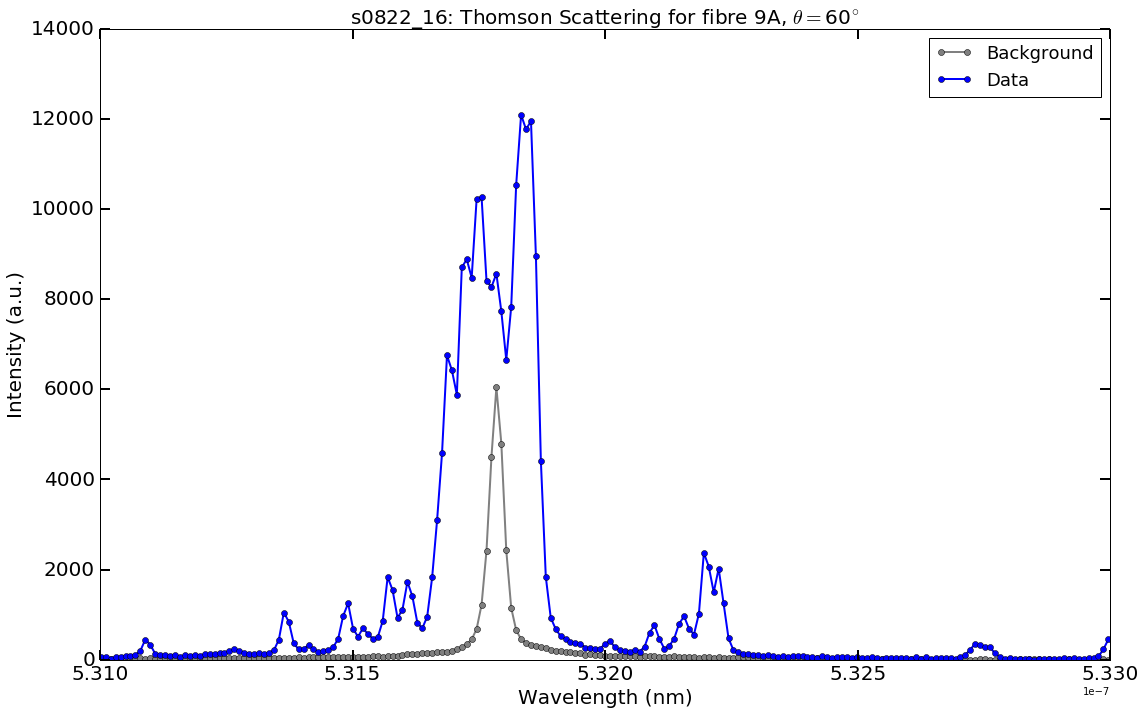

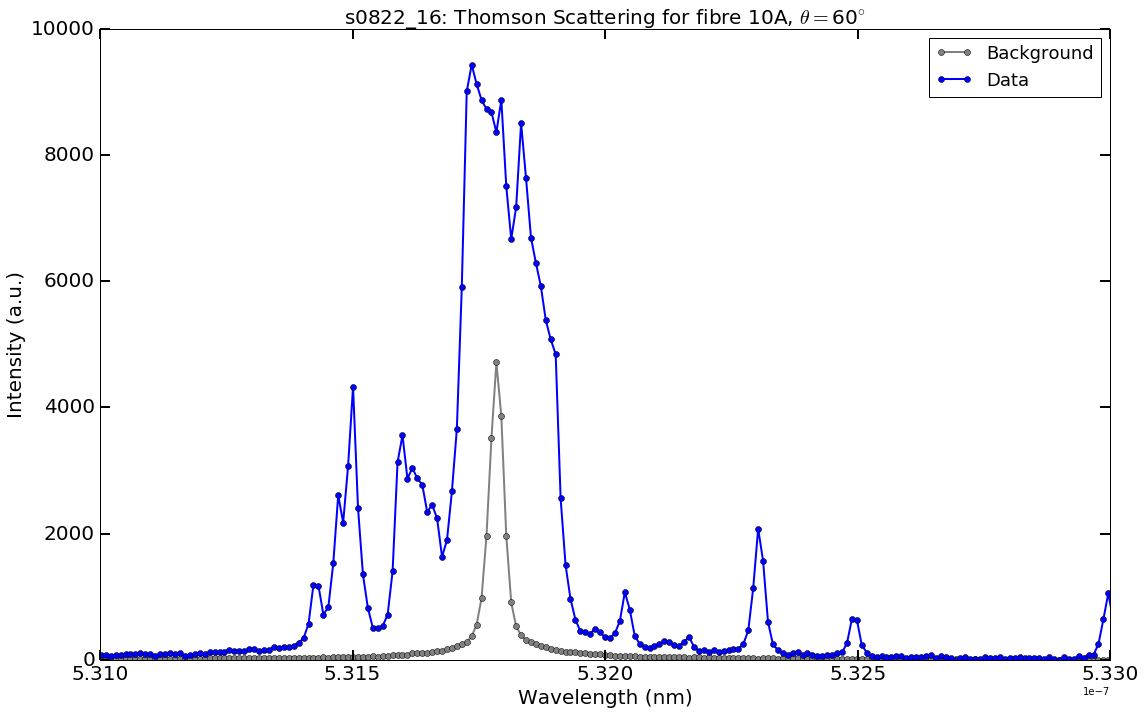

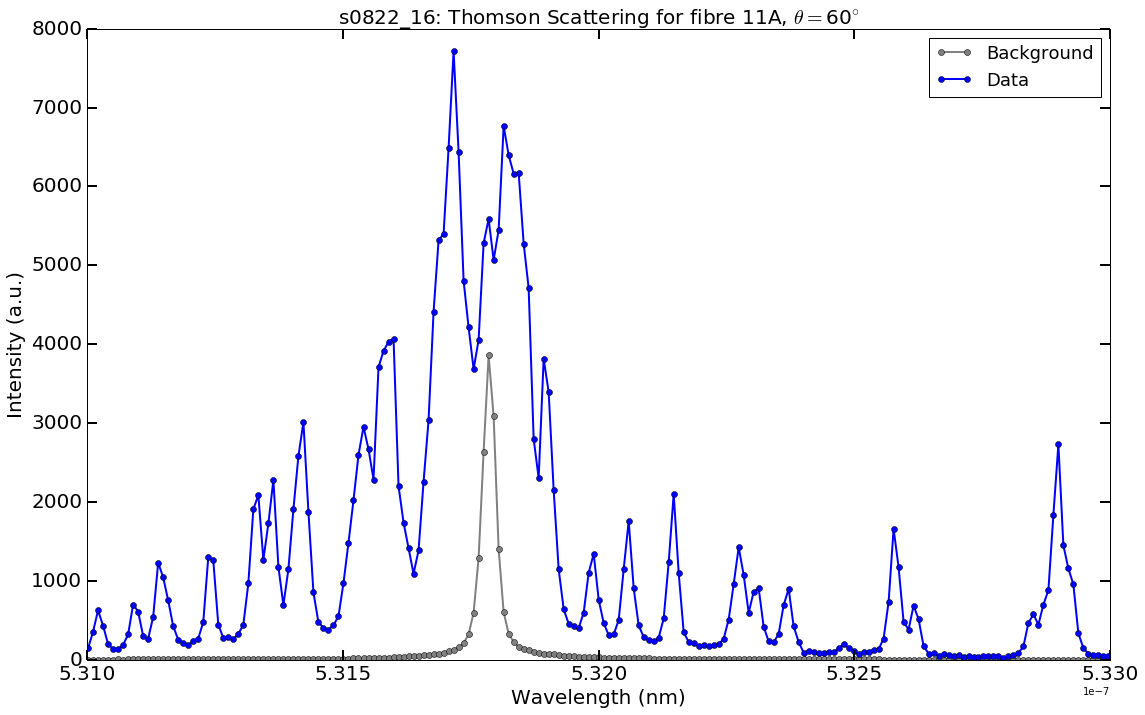

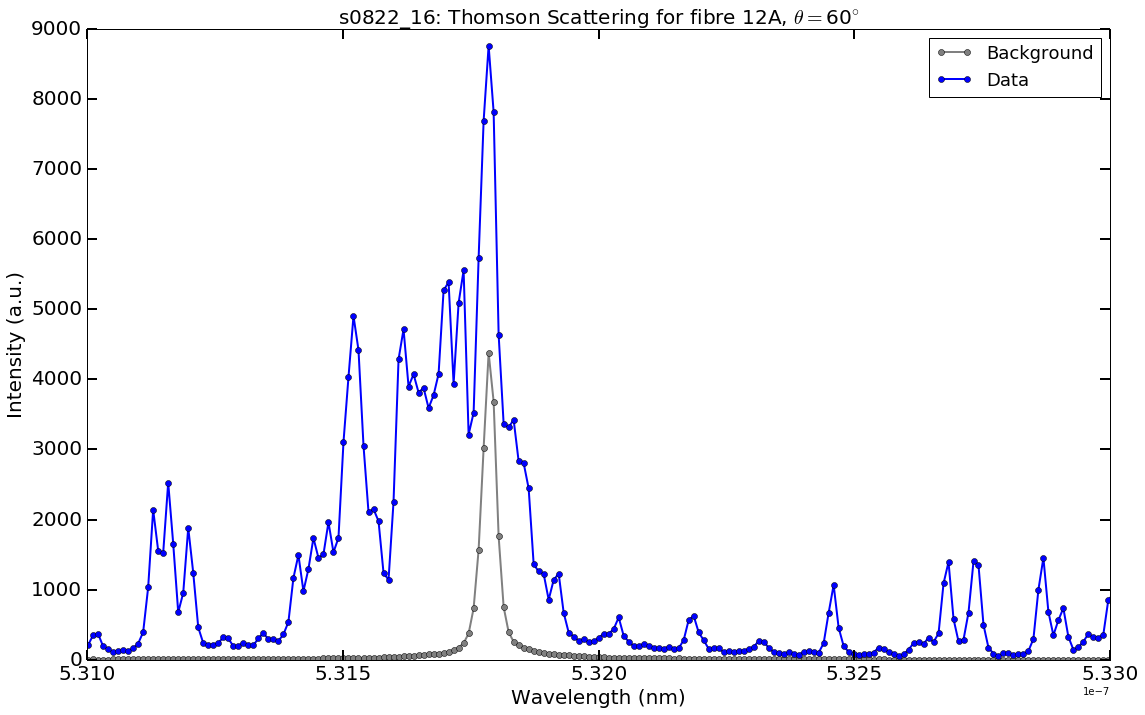

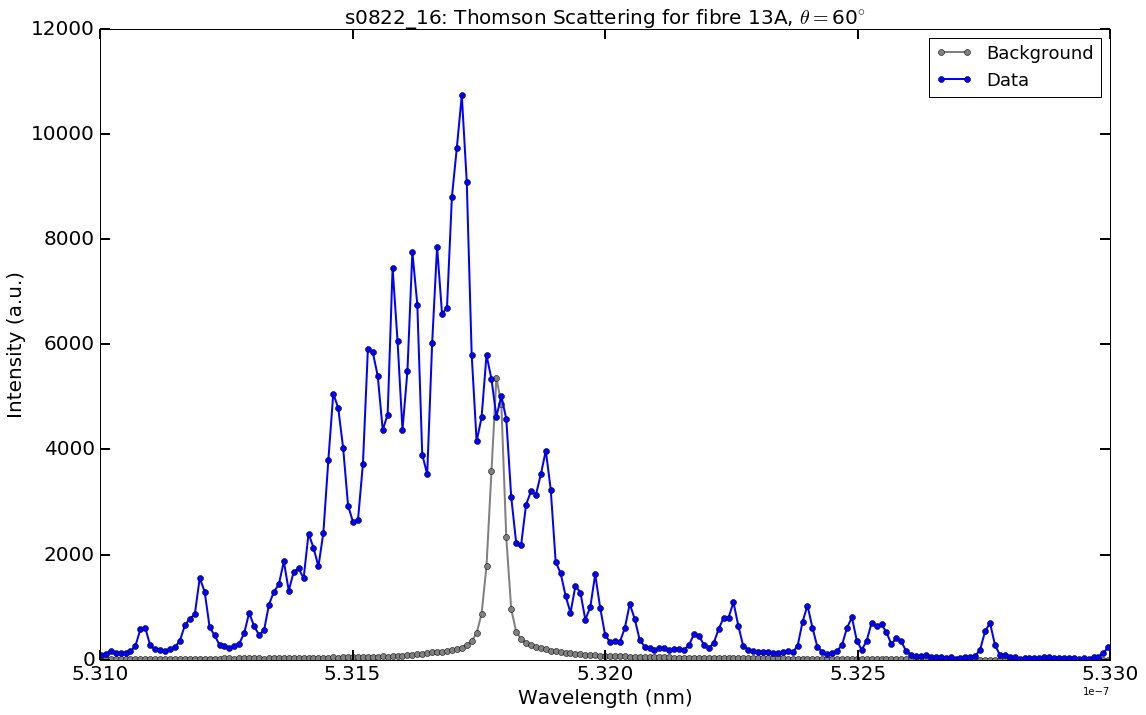

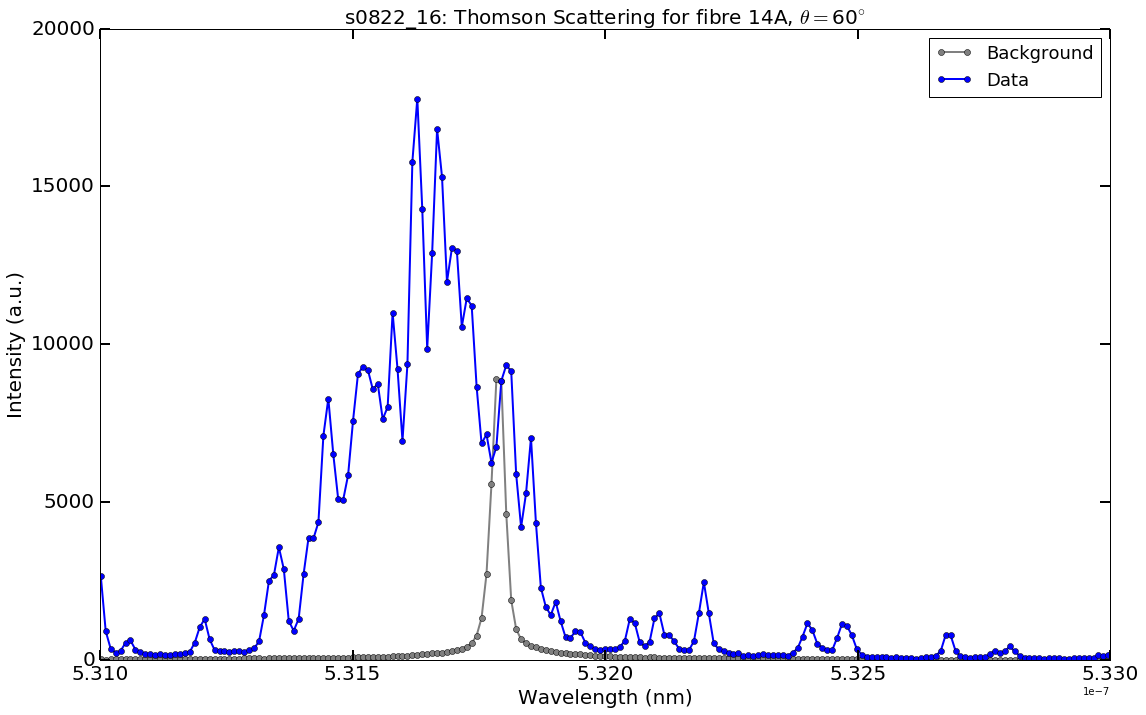

In [5]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='A')

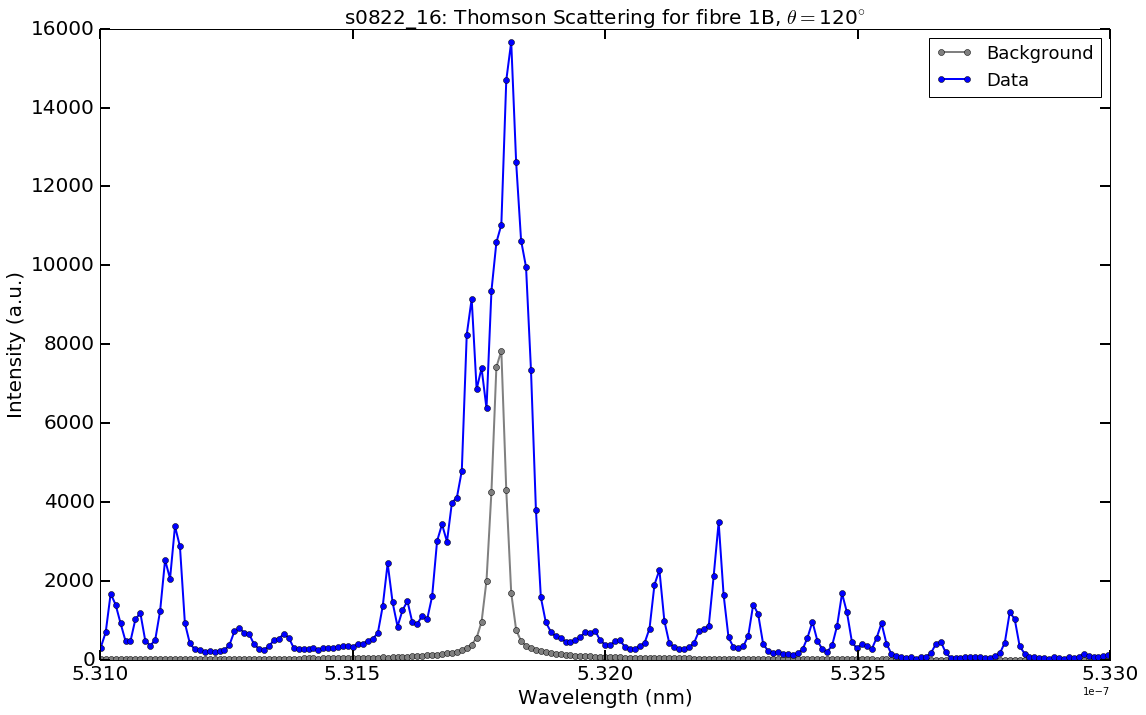

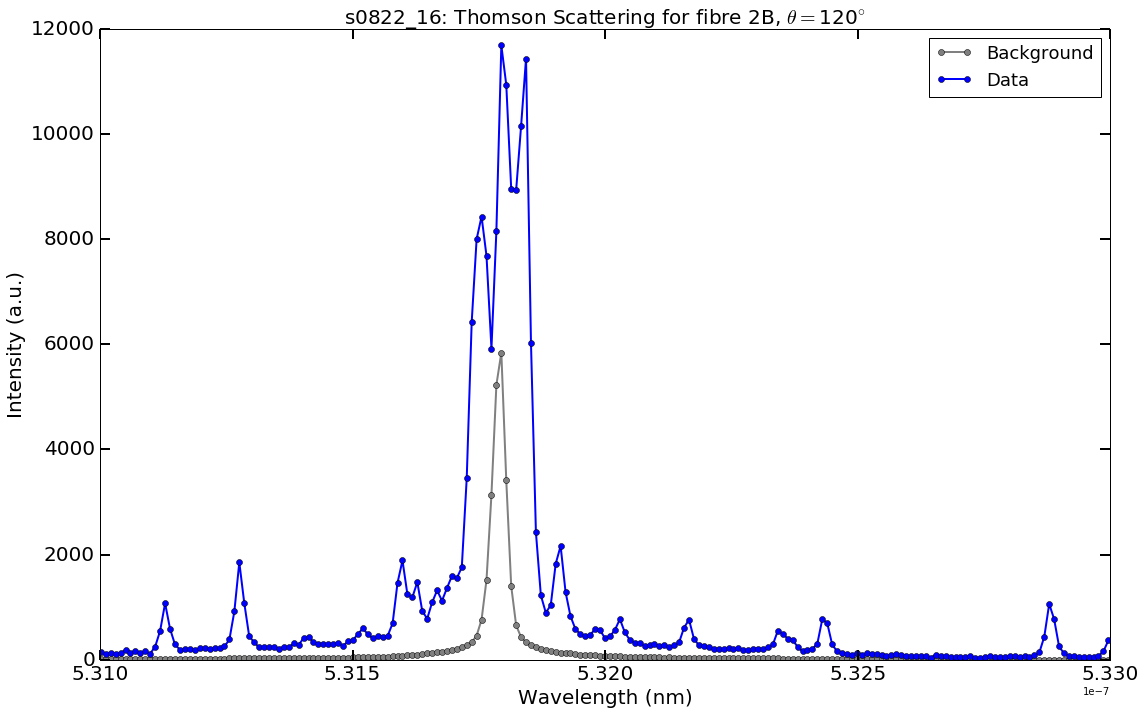

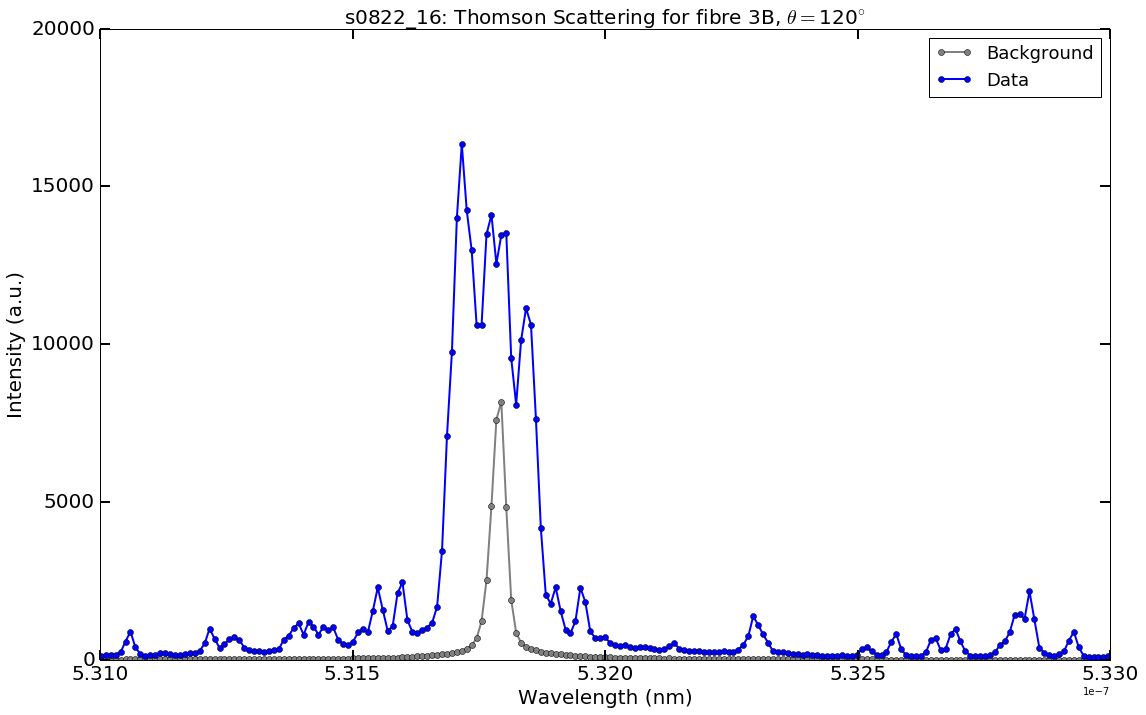

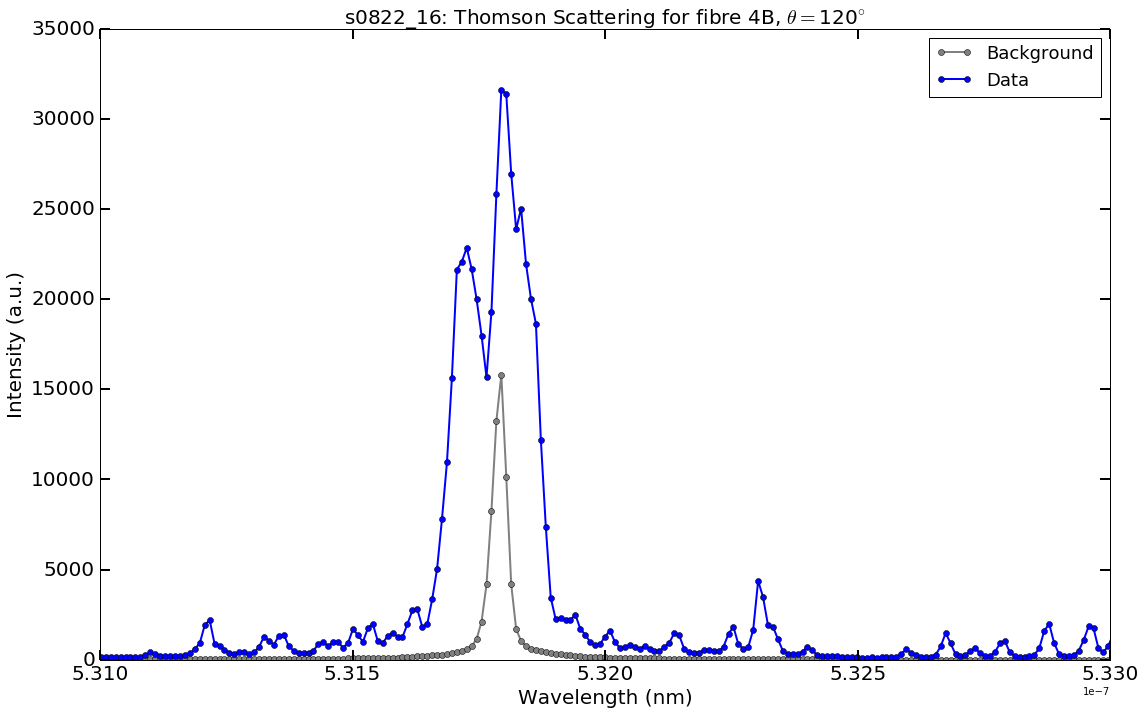

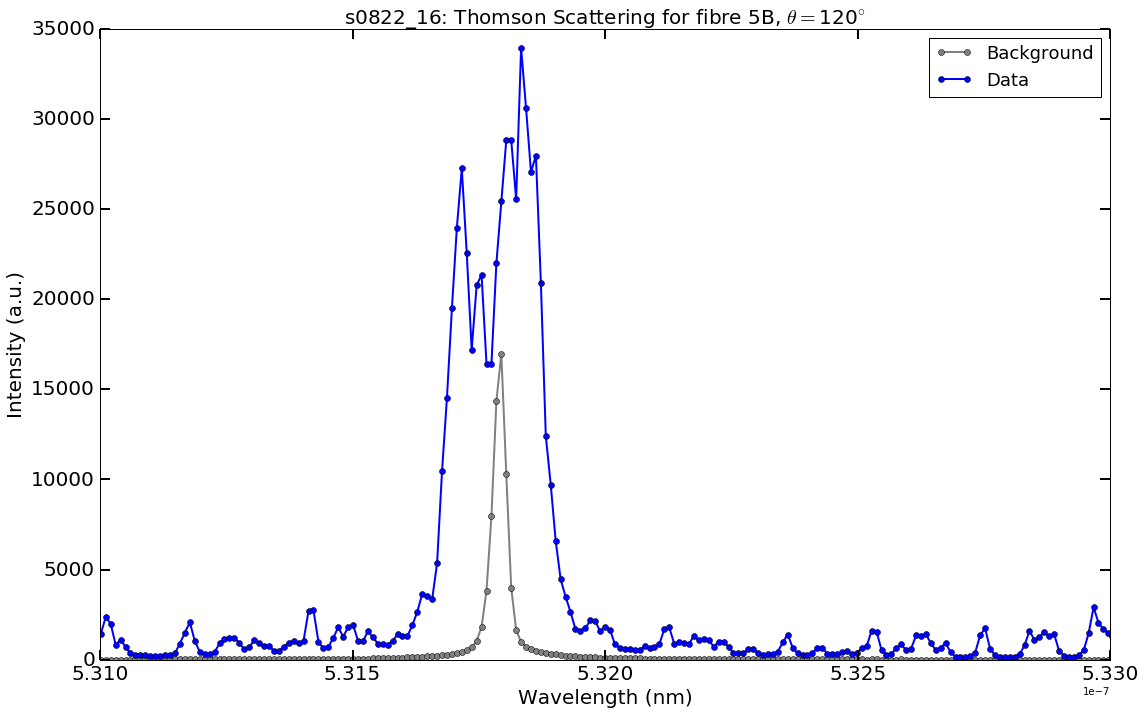

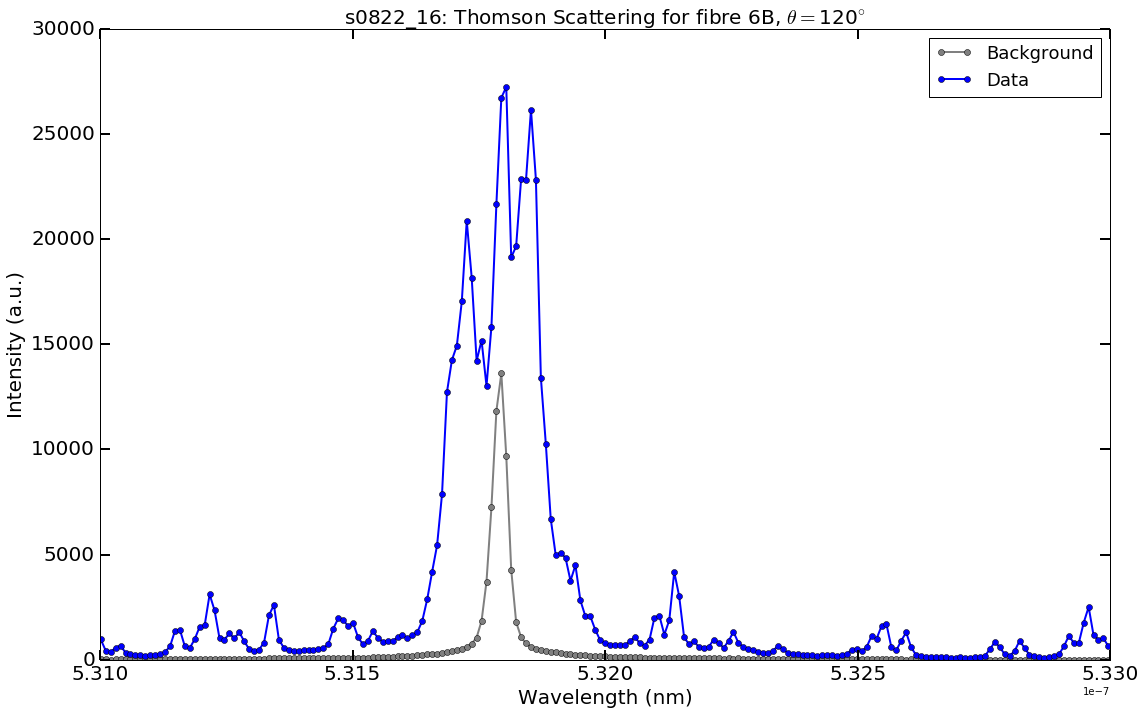

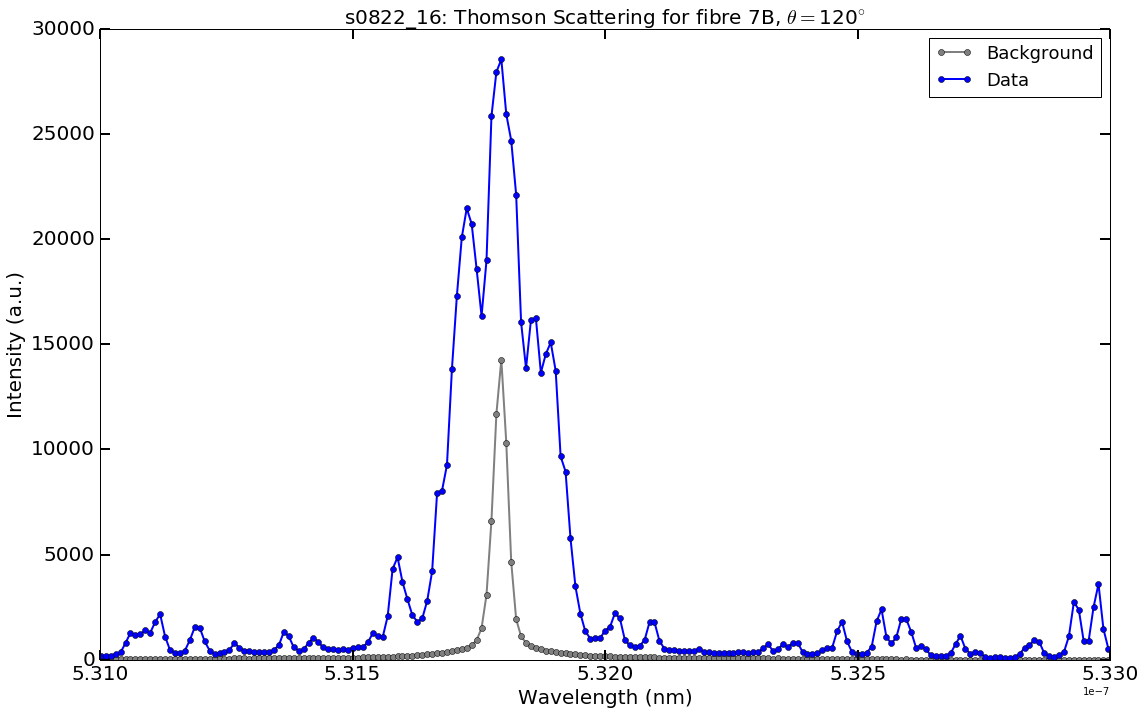

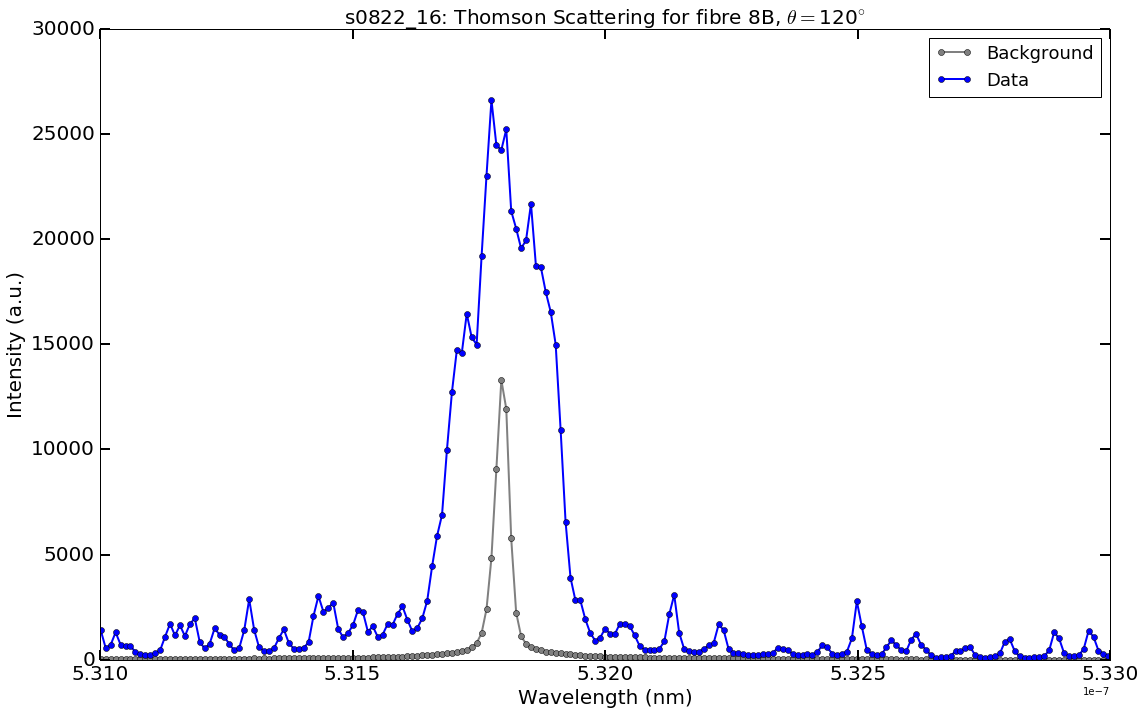

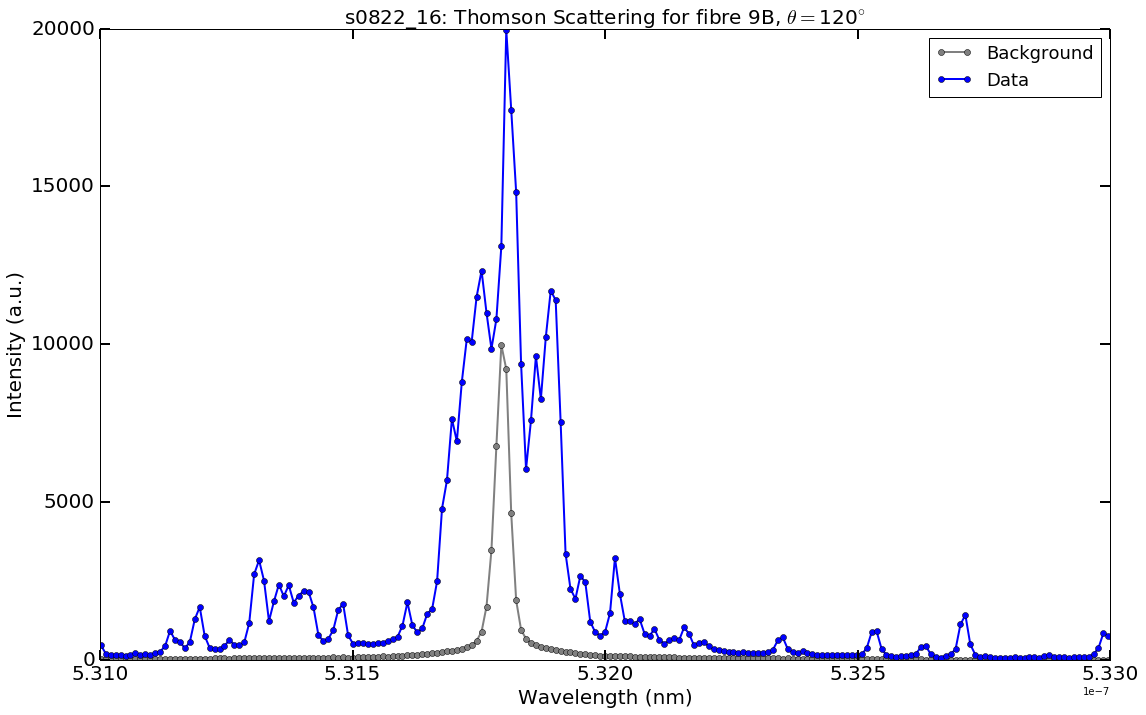

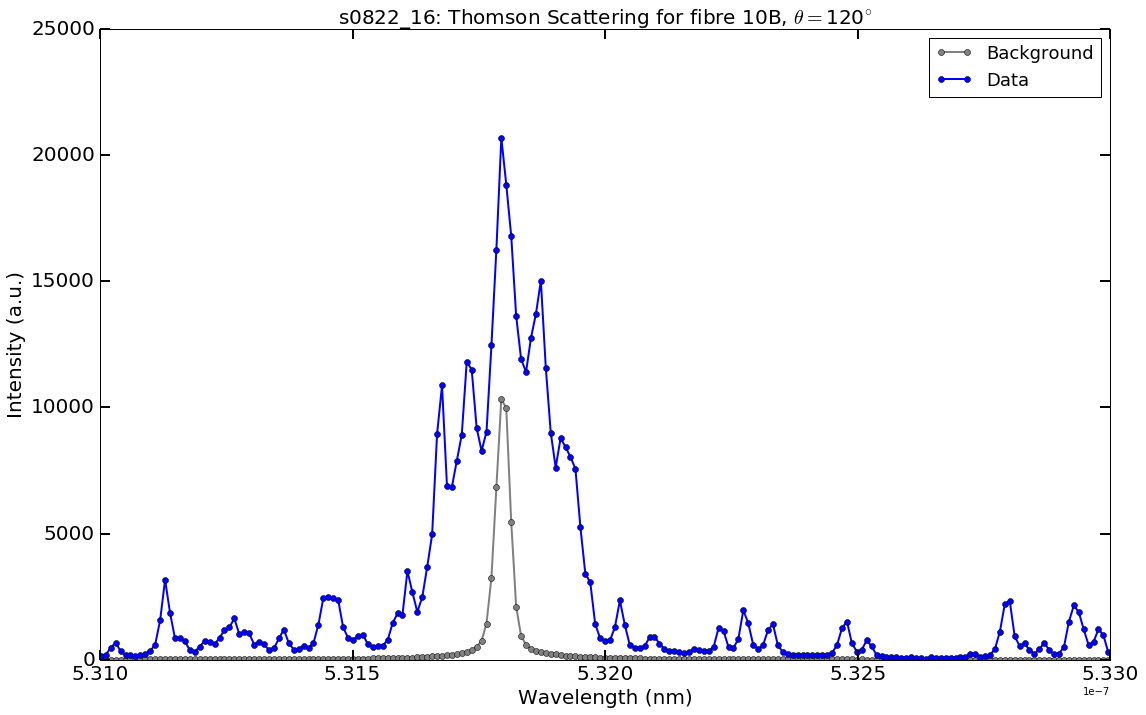

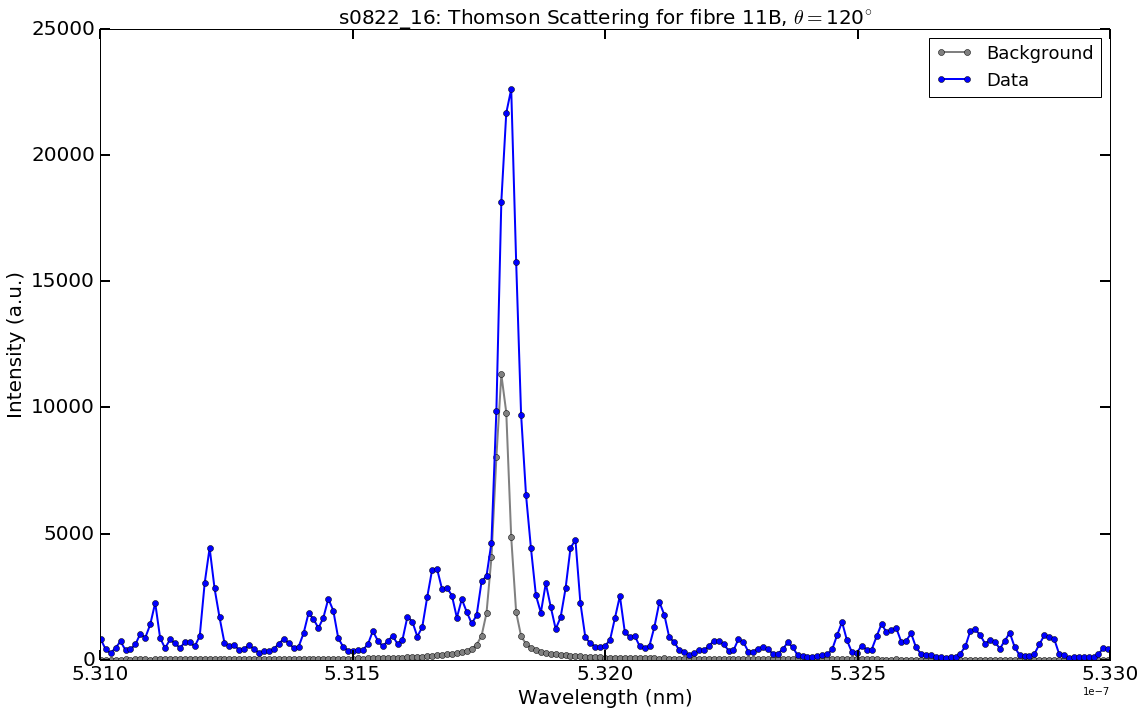

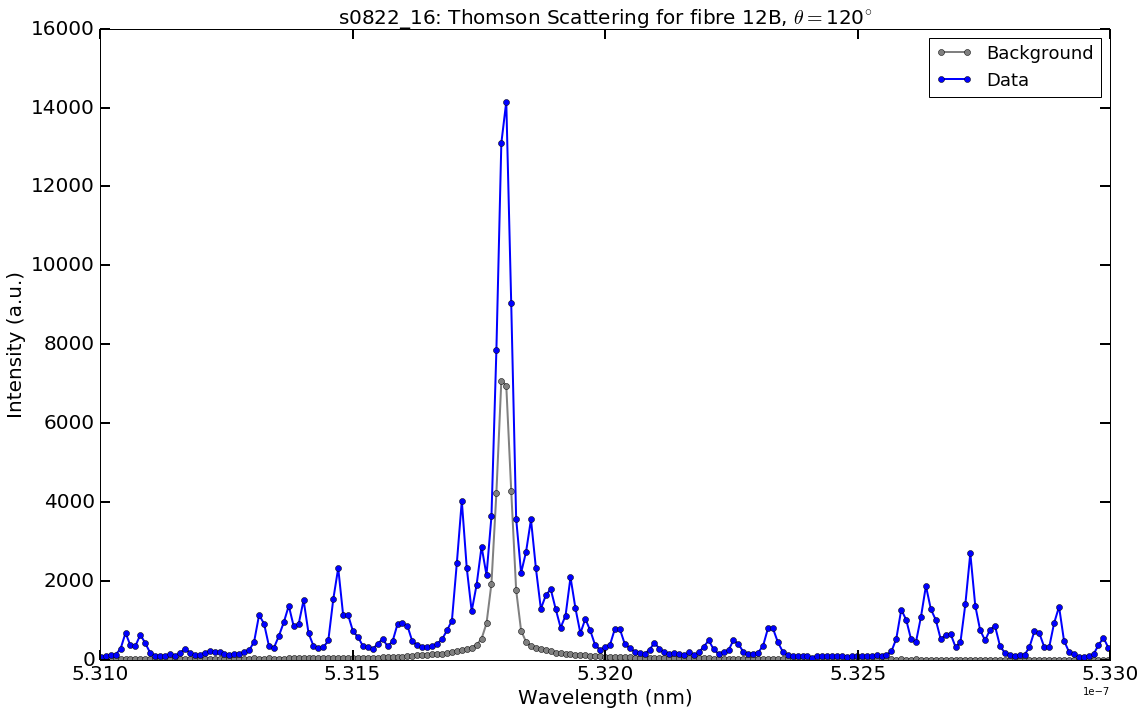

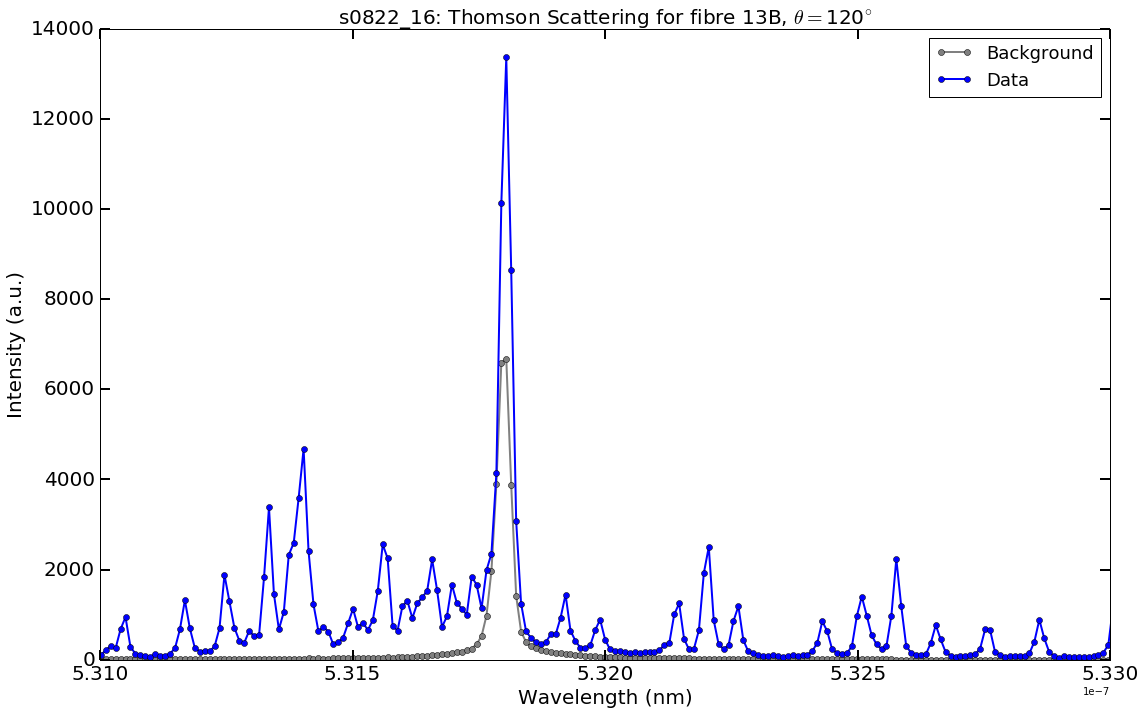

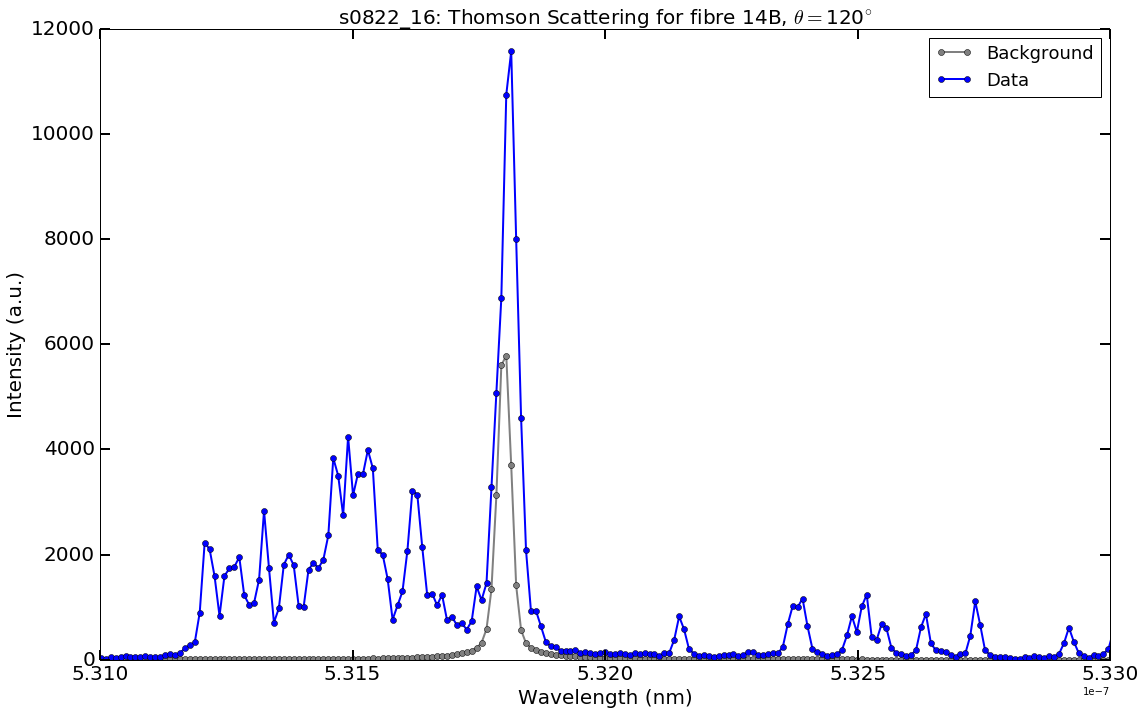

In [14]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='B')